# Retinal Vlood Vessel Segmentation

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img_bgr = cv2.imread("../image.jpg", cv2.IMREAD_GRAYSCALE)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img = cv2.resize(img_rgb, (512, 512), interpolation=cv2.INTER_AREA)

selem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))

In [8]:
# Top-hat et Bottom-hat
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, selem)
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, selem)

tophat = cv2.subtract(img, opened)
bothat = cv2.subtract(closed, img)

# Rehaussement du contraste global
enhanced = cv2.add(img, tophat)
enhanced = cv2.subtract(enhanced, bothat)

# Normalisation
enhanced = cv2.normalize(enhanced, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


small_selem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

# Opening = suppression du bruit clair isolé
opened = cv2.morphologyEx(enhanced, cv2.MORPH_OPEN, small_selem)

# Closing = comblement de petits trous dans les vaisseaux
cleaned = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, small_selem)

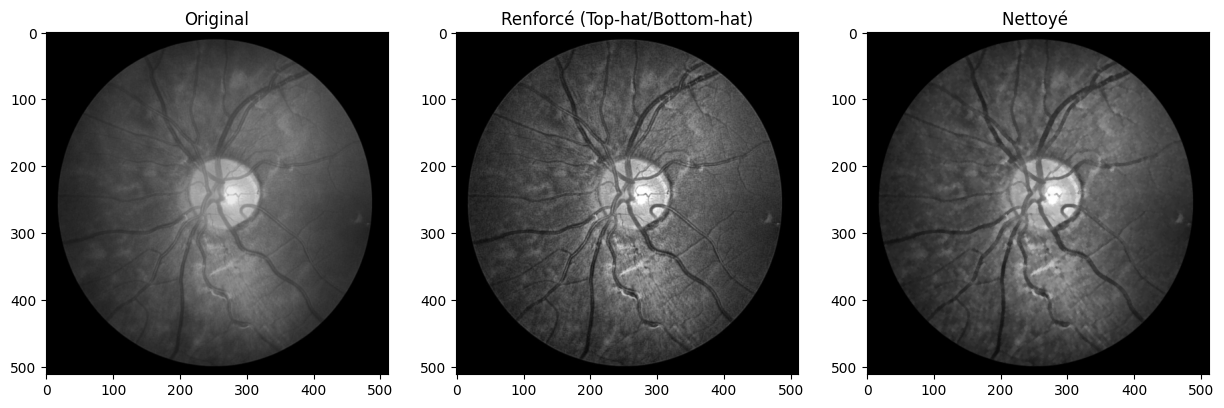

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Original')
plt.subplot(1,3,2); plt.imshow(enhanced, cmap='gray'); plt.title('Renforcé (Top-hat/Bottom-hat)')
plt.subplot(1,3,3); plt.imshow(cleaned, cmap='gray'); plt.title('Nettoyé ')
plt.show()